In [1]:
import pandas as pd
import numpy as np

Загрузим данные из открытых источников:

In [2]:
data = pd.read_csv('https://github.com/C0DEn1s/AAA/raw/main/Netflix/Netflix%20subscription%20fee%20Dec-2021.csv')
ppp = pd.read_csv('https://github.com/C0DEn1s/AAA/raw/main/Netflix/PPP.csv')
currency = pd.read_csv('https://github.com/C0DEn1s/AAA/raw/main/Netflix/Country%20Currency%20Code%20Mappings.csv')
continents = pd.read_csv('https://github.com/C0DEn1s/AAA/raw/main/Netflix/Continents-countries.csv')

Посмотрим на данные и при необходимости почистим их.

Данные Netflix чистые, уберём столбец с кодом страны, чтобы потом использовать трёхбуквенный код.

In [3]:
data.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99


In [4]:
data.drop(columns=['Country_code'], inplace=True)

In [5]:
data.isna().sum()

Country                          0
Total Library Size               0
No. of TV Shows                  0
No. of Movies                    0
Cost Per Month - Basic ($)       0
Cost Per Month - Standard ($)    0
Cost Per Month - Premium ($)     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        65 non-null     object 
 1   Total Library Size             65 non-null     int64  
 2   No. of TV Shows                65 non-null     int64  
 3   No. of Movies                  65 non-null     int64  
 4   Cost Per Month - Basic ($)     65 non-null     float64
 5   Cost Per Month - Standard ($)  65 non-null     float64
 6   Cost Per Month - Premium ($)   65 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 3.7+ KB


Уберём лишние столбцы из датасета с PPP, также оставим только последние данные, в данном случае это 2020 год.

In [7]:
ppp.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,PPP,TOT,NATUSD,A,2000,1.311512,NaN
1,AUS,PPP,TOT,NATUSD,A,2001,1.326073,NaN
2,AUS,PPP,TOT,NATUSD,A,2002,1.336490,NaN
3,AUS,PPP,TOT,NATUSD,A,2003,1.353236,NaN
4,AUS,PPP,TOT,NATUSD,A,2004,1.365806,NaN


In [8]:
ppp.isna().sum()

LOCATION         0
INDICATOR        0
SUBJECT          0
MEASURE          0
FREQUENCY        0
TIME             0
Value            0
Flag Codes    1248
dtype: int64

In [9]:
ppp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    1248 non-null   object 
 1   INDICATOR   1248 non-null   object 
 2   SUBJECT     1248 non-null   object 
 3   MEASURE     1248 non-null   object 
 4   FREQUENCY   1248 non-null   object 
 5   TIME        1248 non-null   int64  
 6   Value       1248 non-null   float64
 7   Flag Codes  0 non-null      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 78.1+ KB


In [10]:
ppp = ppp[ppp['TIME'] == 2020]

In [11]:
ppp.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
20,AUS,PPP,TOT,NATUSD,A,2020,1.407781,NaN
41,AUT,PPP,TOT,NATUSD,A,2020,0.762386,NaN
62,BEL,PPP,TOT,NATUSD,A,2020,0.743996,NaN
83,CAN,PPP,TOT,NATUSD,A,2020,1.260869,NaN
104,CZE,PPP,TOT,NATUSD,A,2020,12.767303,NaN


In [12]:
ppp.drop(columns=['INDICATOR', 'SUBJECT', 'MEASURE',
                  'FREQUENCY', 'TIME', 'Flag Codes'], inplace=True)
ppp.rename(columns={'Value': 'PPP_value'}, inplace=True)

In [13]:
ppp.head()

,LOCATION,PPP_value
20,AUS,1.407781
41,AUT,0.762386
62,BEL,0.743996
83,CAN,1.260869
104,CZE,12.767303


Загрузим также датасет с трёхбуквенным кодом стран и почистим его.

In [14]:
country_codes = pd.read_xml('https://www.artlebedev.ru/country-list/xml')
country_codes.head()

,name,fullname,english,alpha2,alpha3,iso,location,location-precise
0,Наименование,Полное наименование,На английском,Alpha2,Alpha3,ISO,Часть света,Расположение
1,Абхазия,Республика Абхазия,Abkhazia,AB,ABH,895,Азия,Закавказье
2,Австралия,NaN,Australia,AU,AUS,036,Океания,Австралия и Новая Зеландия
3,Австрия,Австрийская Республика,Austria,AT,AUT,040,Европа,Западная Европа
4,Азербайджан,Республика Азербайджан,Azerbaijan,AZ,AZE,031,Азия,Западная Азия


In [15]:
country_codes.drop(columns=['name', 'fullname', 'alpha2', 'iso',
                            'location', 'location-precise'],
                   index=0, inplace=True)
country_codes.rename(columns={'english': 'country_name', 'alpha3': 'country_code'}, inplace=True)

In [16]:
country_codes.isna().sum()

country_name    0
country_code    0
dtype: int64

In [17]:
country_codes

,country_name,country_code
1,Abkhazia,ABH
2,Australia,AUS
3,Austria,AUT
4,Azerbaijan,AZE
5,Albania,ALB
...,...,...
247,South Georgia and the South Sandwich Islands,SGS
248,South Ossetia,OST
249,South Sudan,SSD
250,Jamaica,JAM


Датасет континентов чистый.

In [18]:
continents.head()

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [19]:
continents.isna().sum()

Continent    0
Country      0
dtype: int64

Уберём лишние столбцы из датасета с валютами.

In [20]:
currency.head()

,Country,CountryCode,Currency,Code
0,New Zealand,NZ,New Zealand Dollars,NZD
1,Cook Islands,CK,New Zealand Dollars,NZD
2,Niue,NU,New Zealand Dollars,NZD
3,Pitcairn,PN,New Zealand Dollars,NZD
4,Tokelau,TK,New Zealand Dollars,NZD


In [21]:
currency.drop(columns=['CountryCode', 'Currency'], inplace=True)
currency.rename(columns={'Code': 'Currency'}, inplace=True)

In [22]:
currency.head()

,Country,Currency
0,New Zealand,NZD
1,Cook Islands,NZD
2,Niue,NZD
3,Pitcairn,NZD
4,Tokelau,NZD


In [23]:
currency.isna().sum()

Country     0
Currency    0
dtype: int64

Теперь данные очищены и готовы к обработке.

Соединим основную таблицу с кодами стран, дополним недостающими значениями.

In [26]:
data = data.merge(country_codes, how='left', left_on='Country', right_on='country_name')
data

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),country_name,country_code
0,Argentina,4760,3154,1606,3.74,6.30,9.26,Argentina,ARG
1,Australia,6114,4050,2064,7.84,12.12,16.39,Australia,AUS
2,Austria,5640,3779,1861,9.03,14.67,20.32,Austria,AUT
3,Belgium,4990,3374,1616,10.16,15.24,20.32,Belgium,BEL
4,Bolivia,4991,3155,1836,7.99,10.99,13.99,NaN,NaN
...,...,...,...,...,...,...,...,...,...
60,Ukraine,5336,3261,2075,5.64,8.46,11.29,Ukraine,UKR
61,United Kingdom,6643,4551,2092,7.91,13.20,18.48,United Kingdom,GBR
62,United States,5818,3826,1992,8.99,13.99,17.99,United States,USA
63,Uruguay,4989,3154,1835,8.99,12.99,15.99,Uruguay,URY


In [27]:
data[data.isna().any(1)]

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),country_name,country_code
4,Bolivia,4991,3155,1836,7.99,10.99,13.99,NaN,NaN
12,Czechia,7325,5234,2091,8.83,11.49,14.15,NaN,NaN
48,Russia,5711,3624,2087,8.13,10.84,13.56,NaN,NaN
53,South Korea,5195,3334,1861,8.07,11.47,14.45,NaN,NaN
57,Taiwan,5105,3134,1971,9.74,11.90,14.07,NaN,NaN


In [28]:
data.loc[data.Country == 'Bolivia', 'country_code'] = 'BOL'
data.loc[data.Country == 'Czechia', 'country_code'] = 'CZE'
data.loc[data.Country == 'Russia', 'country_code'] = 'RUS'
data.loc[data.Country == 'South Korea', 'country_code'] = 'KOR'
data.loc[data.Country == 'Taiwan', 'country_code'] = 'TWN'

In [29]:
data.drop(columns=['country_name'], inplace=True)

Так же поступим с таблицей валют, руками допишем отсутствующие значения.

In [30]:
data = data.merge(currency, how='left', left_on='Country', right_on='Country')

In [31]:
data.loc[data.isna().any(1)]

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),country_code,Currency
1,Australia,6114,4050,2064,7.84,12.12,16.39,AUS,NaN
11,Croatia,2274,1675,599,9.03,11.29,13.54,HRV,NaN
12,Czechia,7325,5234,2091,8.83,11.49,14.15,CZE,NaN
37,Moldova,3937,2473,1464,9.03,11.29,13.54,MDA,NaN
48,Russia,5711,3624,2087,8.13,10.84,13.56,RUS,NaN
51,Slovakia,7035,5055,1980,9.03,11.29,13.54,SVK,NaN
53,South Korea,5195,3334,1861,8.07,11.47,14.45,KOR,NaN


In [32]:
data.loc[data.Country == 'Australia', 'Currency'] = 'AUD'
data.loc[data.Country == 'Croatia', 'Currency'] = 'HRK'
data.loc[data.Country == 'Czechia', 'Currency'] = 'CZK'
data.loc[data.Country == 'Moldova', 'Currency'] = 'MDL'
data.loc[data.Country == 'Russia', 'Currency'] = 'RUB'
data.loc[data.Country == 'Slovakia', 'Currency'] = 'SKK'
data.loc[data.Country == 'South Korea', 'Currency'] = 'KRW'

И с континентами.

In [33]:
data = data.merge(continents, how='left', left_on='Country', right_on='Country')

In [34]:
data.loc[data.isna().any(1)]

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),country_code,Currency,Continent
12,Czechia,7325,5234,2091,8.83,11.49,14.15,CZE,CZK,NaN
19,Gibraltar,6167,4079,2088,9.03,14.67,20.32,GIB,GIP,NaN
23,Hong Kong,4746,2883,1863,8.08,10.00,11.93,HKG,HKD,NaN
48,Russia,5711,3624,2087,8.13,10.84,13.56,RUS,RUB,NaN
53,South Korea,5195,3334,1861,8.07,11.47,14.45,KOR,KRW,NaN
57,Taiwan,5105,3134,1971,9.74,11.90,14.07,TWN,TWD,NaN
62,United States,5818,3826,1992,8.99,13.99,17.99,USA,USD,NaN


In [35]:
data.loc[data.Country == 'Czechia', 'Continent'] = 'Europe'
data.loc[data.Country == 'Gibraltar', 'Continent'] = 'Europe'
data.loc[data.Country == 'Hong Kong', 'Continent'] = 'Asia'
data.loc[data.Country == 'Russia', 'Continent'] = 'Europe'
data.loc[data.Country == 'South Korea', 'Continent'] = 'Asia'
data.loc[data.Country == 'Taiwan', 'Continent'] = 'Asia'
data.loc[data.Country == 'United States', 'Continent'] = 'North America'

Пропуски с PPP значениями заполним медианой остальных, медиана лучше, так как среднее слишком велико, из-за некоторых стран, значения которых 800+ (их немного, но они есть).

In [36]:
data = data.merge(ppp, how='left', left_on='country_code', right_on='LOCATION')
data

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),country_code,Currency,Continent,LOCATION,PPP_value
0,Argentina,4760,3154,1606,3.74,6.30,9.26,ARG,ARS,South America,ARG,28.673797
1,Australia,6114,4050,2064,7.84,12.12,16.39,AUS,AUD,Oceania,AUS,1.407781
2,Austria,5640,3779,1861,9.03,14.67,20.32,AUT,EUR,Europe,AUT,0.762386
3,Belgium,4990,3374,1616,10.16,15.24,20.32,BEL,EUR,Europe,BEL,0.743996
4,Bolivia,4991,3155,1836,7.99,10.99,13.99,BOL,BOB,South America,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
60,Ukraine,5336,3261,2075,5.64,8.46,11.29,UKR,UAH,Europe,NaN,NaN
61,United Kingdom,6643,4551,2092,7.91,13.20,18.48,GBR,GBP,Europe,GBR,0.687603
62,United States,5818,3826,1992,8.99,13.99,17.99,USA,USD,North America,USA,1.000000
63,Uruguay,4989,3154,1835,8.99,12.99,15.99,URY,UYU,South America,NaN,NaN


In [37]:
data[data.isna().any(1)]

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),country_code,Currency,Continent,LOCATION,PPP_value
4,Bolivia,4991,3155,1836,7.99,10.99,13.99,BOL,BOB,South America,NaN,NaN
14,Ecuador,4992,3155,1837,7.99,10.99,13.99,ECU,ECS,South America,NaN,NaN
19,Gibraltar,6167,4079,2088,9.03,14.67,20.32,GIB,GIP,Europe,NaN,NaN
21,Guatemala,4767,3154,1613,7.99,10.99,13.99,GTM,GTQ,North America,NaN,NaN
22,Honduras,4989,3154,1835,7.99,10.99,13.99,HND,HNL,North America,NaN,NaN
23,Hong Kong,4746,2883,1863,8.08,10.00,11.93,HKG,HKD,Asia,NaN,NaN
33,Liechtenstein,3048,1712,1336,12.88,20.46,26.96,LIE,CHF,Europe,NaN,NaN
35,Malaysia,5952,3565,2387,8.29,10.65,13.02,MYS,MYR,Asia,NaN,NaN
37,Moldova,3937,2473,1464,9.03,11.29,13.54,MDA,MDL,Europe,NaN,NaN
38,Monaco,5804,3806,1998,9.03,13.54,18.06,MCO,EUR,Europe,NaN,NaN


In [38]:
data.loc[data.PPP_value.isna(), 'PPP_value'] = data.PPP_value.median()

In [39]:
data.isna().sum()

Country                           0
Total Library Size                0
No. of TV Shows                   0
No. of Movies                     0
Cost Per Month - Basic ($)        0
Cost Per Month - Standard ($)     0
Cost Per Month - Premium ($)      0
country_code                      0
Currency                          0
Continent                         0
LOCATION                         20
PPP_value                         0
dtype: int64

In [40]:
data.drop(columns=['LOCATION'], inplace=True)

In [41]:
data

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),country_code,Currency,Continent,PPP_value
0,Argentina,4760,3154,1606,3.74,6.30,9.26,ARG,ARS,South America,28.673797
1,Australia,6114,4050,2064,7.84,12.12,16.39,AUS,AUD,Oceania,1.407781
2,Austria,5640,3779,1861,9.03,14.67,20.32,AUT,EUR,Europe,0.762386
3,Belgium,4990,3374,1616,10.16,15.24,20.32,BEL,EUR,Europe,0.743996
4,Bolivia,4991,3155,1836,7.99,10.99,13.99,BOL,BOB,South America,1.704147
...,...,...,...,...,...,...,...,...,...,...,...
60,Ukraine,5336,3261,2075,5.64,8.46,11.29,UKR,UAH,Europe,1.704147
61,United Kingdom,6643,4551,2092,7.91,13.20,18.48,GBR,GBP,Europe,0.687603
62,United States,5818,3826,1992,8.99,13.99,17.99,USA,USD,North America,1.000000
63,Uruguay,4989,3154,1835,8.99,12.99,15.99,URY,UYU,South America,1.704147


Данные готовы.

Построим графики отношения цены подписок от значений PPP.

In [42]:
import matplotlib.pyplot as plt

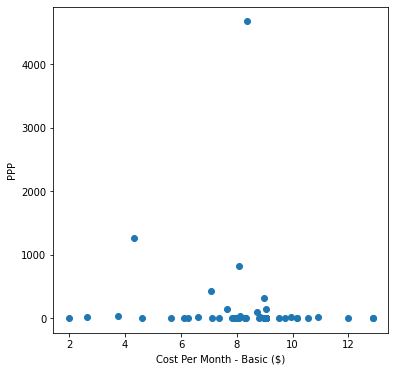

In [43]:
fig = plt.figure(figsize=(6, 6))
plt.xlabel('Cost Per Month - Basic ($)')
plt.ylabel('PPP')
plt.scatter(data['Cost Per Month - Basic ($)'], data['PPP_value'])

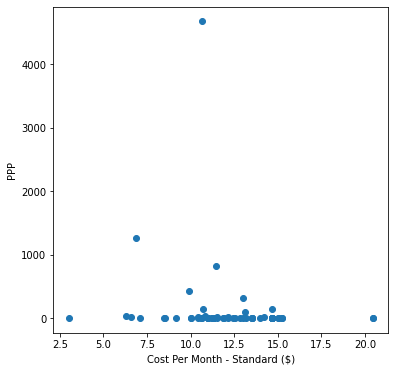

In [44]:
fig = plt.figure(figsize=(6, 6))
plt.xlabel('Cost Per Month - Standard ($)')
plt.ylabel('PPP')
plt.scatter(data['Cost Per Month - Standard ($)'], data['PPP_value'])

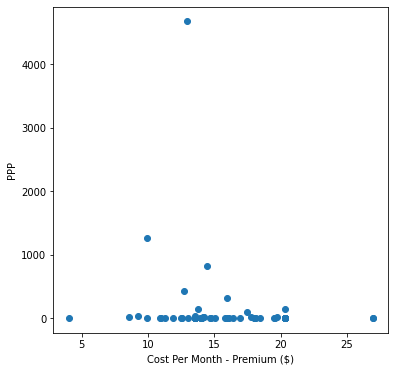

In [45]:
fig = plt.figure(figsize=(6, 6))
plt.xlabel('Cost Per Month - Premium ($)')
plt.ylabel('PPP')
plt.scatter(data['Cost Per Month - Premium ($)'], data['PPP_value'])

Корреляции практически нет. Посмотрим также значения.

In [46]:
data[['Cost Per Month - Basic ($)',
      'Cost Per Month - Standard ($)',
      'Cost Per Month - Premium ($)',
      'PPP_value']].corr()

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),PPP_value
Cost Per Month - Basic ($),1.000000,0.898535,0.820914,-0.079169
Cost Per Month - Standard ($),0.898535,1.000000,0.978768,-0.122993
Cost Per Month - Premium ($),0.820914,0.978768,1.000000,-0.136462
PPP_value,-0.079169,-0.122993,-0.136462,1.000000


Средняя цена подписки (базовой, стандартной, премиум) в зависимости от валюты страны. 

In [47]:
data.groupby('Currency')[['Cost Per Month - Basic ($)',
                         'Cost Per Month - Standard ($)',
                         'Cost Per Month - Premium ($)']].mean()

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Currency,,,
ARS,3.740000,6.300000,9.260000
AUD,7.840000,12.120000,16.390000
BGN,9.030000,11.290000,13.540000
BOB,7.990000,10.990000,13.990000
BRL,4.610000,7.110000,9.960000
CAD,7.910000,11.870000,15.030000
CHF,12.880000,20.460000,26.960000
CLP,7.070000,9.910000,12.740000
COP,4.310000,6.860000,9.930000


Средняя цена подписки (базовой, стандартной, премиум) в зависимости от континента.

In [48]:
data.groupby('Continent')[['Cost Per Month - Basic ($)',
                         'Cost Per Month - Standard ($)',
                         'Cost Per Month - Premium ($)']].mean()

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Continent,,,
Africa,6.260000,10.050000,12.580000
Asia,7.636667,10.404167,12.966667
Europe,9.230294,13.304412,17.545588
North America,8.081667,11.876667,15.205000
Oceania,8.320000,12.325000,16.665000
South America,6.709000,9.619000,12.555000


Стоимость подписки относительно среднего дохода (базовая, стандартная, премиум) в Чехии.

In [49]:
(
    data.loc[data.Country == 'Czechia'][['Cost Per Month - Basic ($)', 
                                         'Cost Per Month - Standard ($)',
                                         'Cost Per Month - Premium ($)']] \
    /
    data.loc[data.Country == 'Czechia']['PPP_value'].item()
)

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
12,0.69161,0.899955,1.1083


Топ-5 стран, имеющих самую большую доступную коллекцию сериалов.

In [50]:
data.sort_values(by='Total Library Size', ascending=False)[['Country', 'Total Library Size']].head()

,Country,Total Library Size
12,Czechia,7325
51,Slovakia,7035
24,Hungary,6884
6,Bulgaria,6797
61,United Kingdom,6643


Процент среднего дохода россиянина, который составляет подписка Netflix.

In [51]:
(
    data.loc[data.Country == 'Russia'][['Cost Per Month - Basic ($)', 
                                        'Cost Per Month - Standard ($)',
                                        'Cost Per Month - Premium ($)']] * 100 \
    /
    data.loc[data.Country == 'Russia']['PPP_value'].item()
)

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
48,33.181405,44.241873,55.343155


Место России, если отсортировать страны по эффективности подписки (Cost Per Title)

In [52]:
total_size = data['Total Library Size']
data['Cost Per Title Basic'] = data['Cost Per Month - Basic ($)'] / (2 * total_size)
data['Cost Per Title Standard'] = data['Cost Per Month - Standard ($)'] / (2 * total_size)
data['Cost Per Title Premium'] = data['Cost Per Month - Premium ($)'] / (2 * total_size)

In [53]:
sorted_data = data.sort_values(by=['Cost Per Title Basic',
                                   'Cost Per Title Standard',
                                   'Cost Per Title Premium']).reset_index(drop=True)

In [54]:
sorted_data.loc[sorted_data.Country == 'Russia']

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),country_code,Currency,Continent,PPP_value,Cost Per Title Basic,Cost Per Title Standard,Cost Per Title Premium
25,Russia,5711,3624,2087,8.13,10.84,13.56,RUS,RUB,Europe,24.501675,0.000712,0.000949,0.001187


В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего?

In [55]:
sorted_data

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),country_code,Currency,Continent,PPP_value,Cost Per Title Basic,Cost Per Title Standard,Cost Per Title Premium
0,Turkey,4639,2930,1709,1.97,3.00,4.02,TUR,TRY,Asia,2.192737,0.000212,0.000323,0.000433
1,India,5843,3718,2125,2.64,6.61,8.60,IND,INR,Asia,21.989558,0.000226,0.000566,0.000736
2,Argentina,4760,3154,1606,3.74,6.30,9.26,ARG,ARS,South America,28.673797,0.000393,0.000662,0.000973
3,Colombia,4991,3156,1835,4.31,6.86,9.93,COL,COP,South America,1258.209373,0.000432,0.000687,0.000995
4,Brazil,4972,3162,1810,4.61,7.11,9.96,BRA,BRL,South America,2.361703,0.000464,0.000715,0.001002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Sweden,4361,2973,1388,10.90,14.20,19.70,SWE,SEK,Europe,8.730297,0.001250,0.001628,0.002259
61,Denmark,4558,2978,1580,12.00,15.04,19.60,DNK,DKK,Europe,6.619343,0.001316,0.001650,0.002150
62,San Marino,2310,1937,373,9.03,14.67,20.32,SMR,EUR,Europe,1.704147,0.001955,0.003175,0.004398
63,Croatia,2274,1675,599,9.03,11.29,13.54,HRV,HRK,Europe,3.241294,0.001985,0.002482,0.002977


Turkey